In [160]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as pyp
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as px
import plotly.express as px
import random
import plotly.figure_factory as ff


In [161]:
rawdata1 = pd.read_csv('D:\\archive (2)\\accidents_2005_to_2007.csv',low_memory=False)
rawdata2=pd.read_csv('D:\\archive (2)\\accidents_2009_to_2011.csv',low_memory=False)
rawdata3=pd.read_csv('D:\\archive (2)\\accidents_2012_to_2014.csv',low_memory=False)
crashe = pd.concat([rawdata1,rawdata2 ,rawdata3],axis = 0)

In [162]:
crashe.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [163]:
crashe.shape

(1504150, 33)

In [164]:
crashe.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [165]:
crashes = crashes.loc[:,["Accident_Severity","Number_of_Casualties","Day_of_Week","Date","Time","Local_Authority_(District)"
                         ,"Local_Authority_(Highway)","Road_Type","Speed_limit","Light_Conditions","Weather_Conditions",
                        "Road_Surface_Conditions","Year"]]

In [168]:
crashes.tail(5)


,Accident_Severity,Number_of_Casualties,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year
464692,2,1,1,07/12/2014,22:20,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Snowing without high winds,Snow,2014
464693,3,2,5,11/12/2014,06:40,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Snow,2014
464694,3,1,3,09/12/2014,02:00,917,S12000006,Single carriageway,40,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2014
464695,2,2,4,17/12/2014,06:55,917,S12000006,Single carriageway,60,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2014
464696,3,2,4,24/12/2014,15:00,917,S12000006,Single carriageway,60,Daylight: Street light present,Fine without high winds,Wet/Damp,2014


In [167]:
crashes.isnull().sum()

Accident_Severity                0
Number_of_Casualties             0
Day_of_Week                      0
Date                             0
Time                           117
Local_Authority_(District)       0
Local_Authority_(Highway)        0
Road_Type                        0
Speed_limit                      0
Light_Conditions                 0
Weather_Conditions             126
Road_Surface_Conditions       1958
Year                             0
dtype: int64

# Yıl ve Günün Kaza ile bağlantısı 


In [169]:
crashes["Year"].unique()

array(['2005', '2006', '2007', '2009', '2010', '2011', '2012', '2013',
       '2014'], dtype=object)

In [170]:
crashes.Year = crashes.Year.astype(str)
crash_value= crashes.groupby("Year")
total_crash=pd.DataFrame(crash_value.size().sort_values(ascending=False),columns=["Number of accidents"])
total_crash.head()

,Number of accidents
Year,
2005,198735
2006,189161
2007,182115
2012,179715
2009,163554


In [152]:
crashes.Day_of_Week = crashes.Day_of_Week.astype(int)
crash_value = crashes.groupby("Day_of_Week")
total_crash = pd.DataFrame(crash_value_size().sort_values(ascending = False),columns=["Number of accidents"])
total_crash.head()

,Number of accidents
Day_of_Week,
6,247137
5,226411
4,226359
3,224110
2,213748


# Kaza oranlarını arttıran sebepler

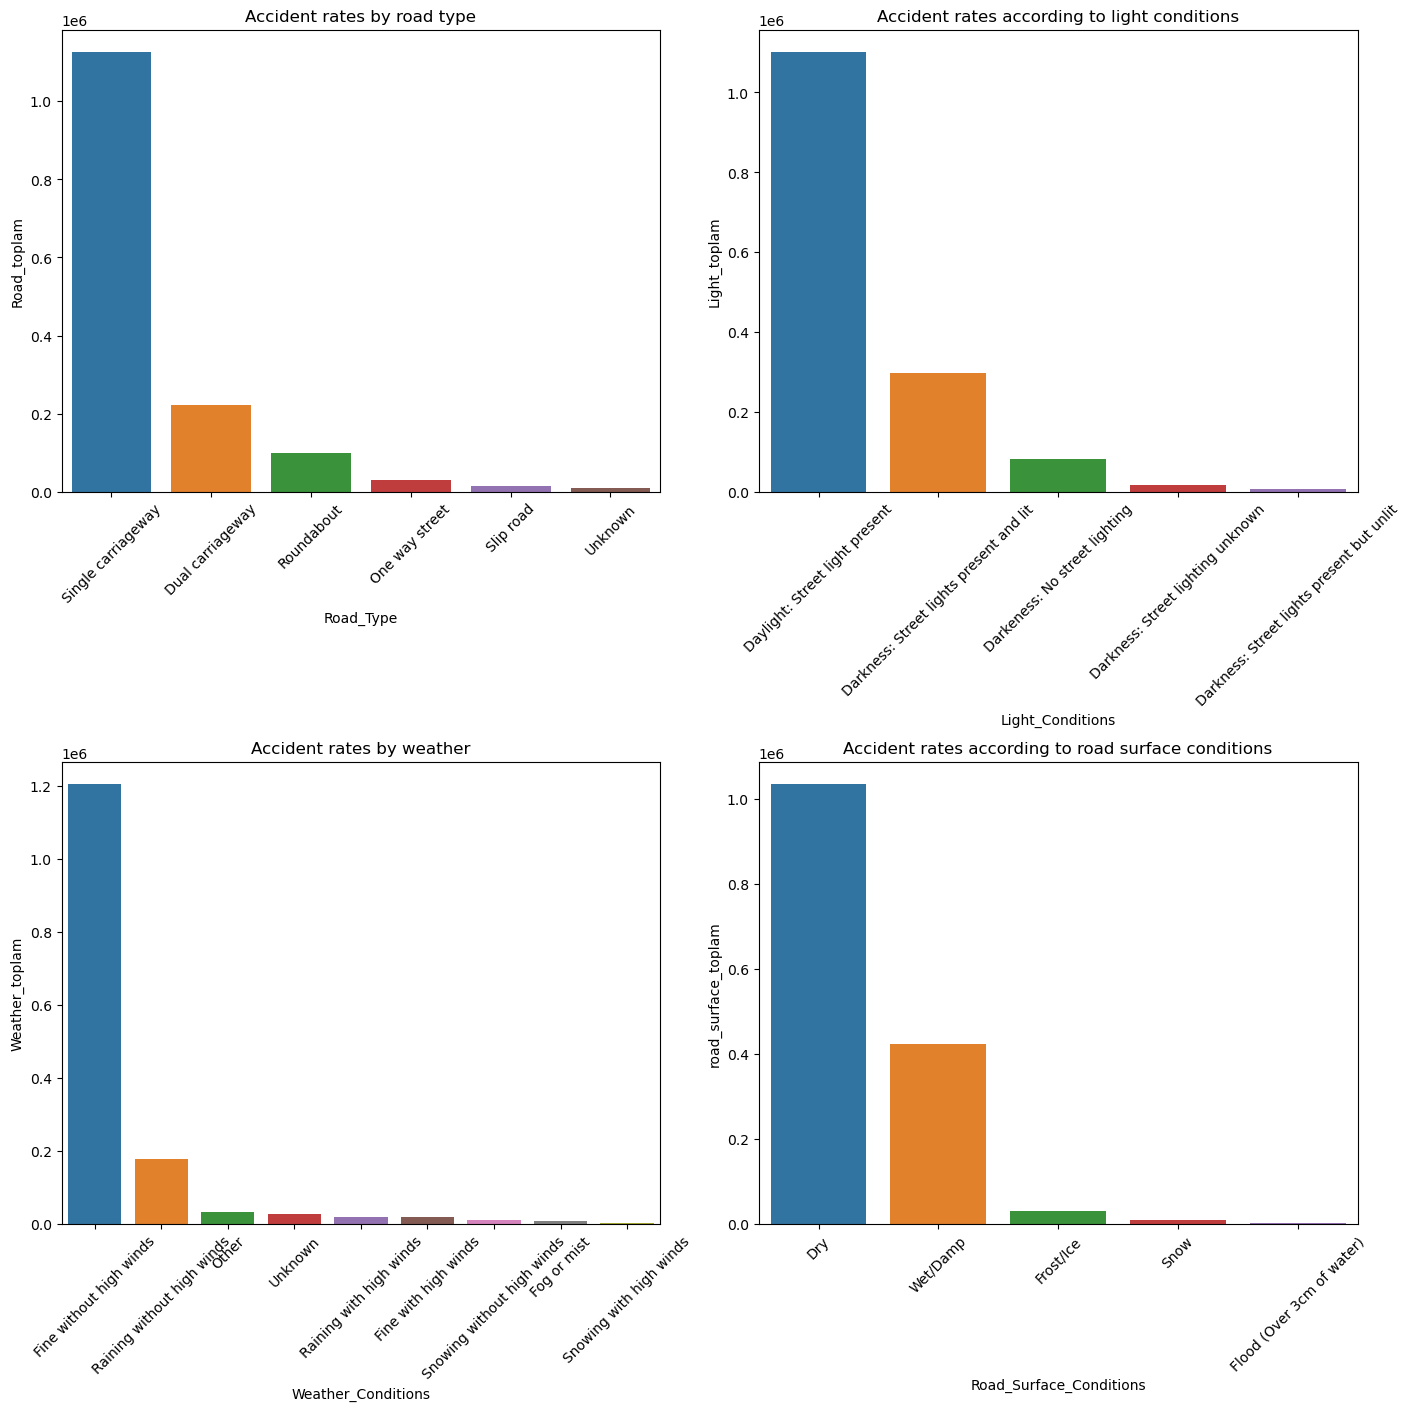

In [154]:
f, axs = plt.subplots(2,2, figsize = (14,14), constrained_layout = True)

road_sayisi = crashes.groupby("Road_Type")
toplam_road=pd.DataFrame(road_sayisi.size().sort_values(ascending=False),columns=["Road_toplam"])
light_sayisi = crashes.groupby("Light_Conditions")
toplam_light=pd.DataFrame(light_sayisi.size().sort_values(ascending=False),columns=["Light_toplam"])
weather_sayisi = crashes.groupby("Weather_Conditions")
toplam_weather=pd.DataFrame(weather_sayisi.size().sort_values(ascending=False),columns=["Weather_toplam"])
surface_sayisi = crashes.groupby("Road_Surface_Conditions")
toplam_surface=pd.DataFrame(surface_sayisi.size().sort_values(ascending=False),columns=["road_surface_toplam"])

                       
                       

ax=sns.barplot(x=toplam_road.index, y=toplam_road["Road_toplam"], data=toplam_road, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_light.index,y=toplam_light["Light_toplam"], data=toplam_light, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_weather.index,y=toplam_weather["Weather_toplam"], data=toplam_weather, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_surface.index,y=toplam_surface["road_surface_toplam"], data=toplam_surface, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)


axs[0, 0].title.set_text('Accident rates by road type')
axs[0, 1].title.set_text('Accident rates according to light conditions')
axs[1, 0].title.set_text('Accident rates by weather')
axs[1, 1].title.set_text('Accident rates according to road surface conditions')





# Kırsal ve kentsel alan arasında ki fark

In [179]:
crashes2 = crashe.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Date','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1)

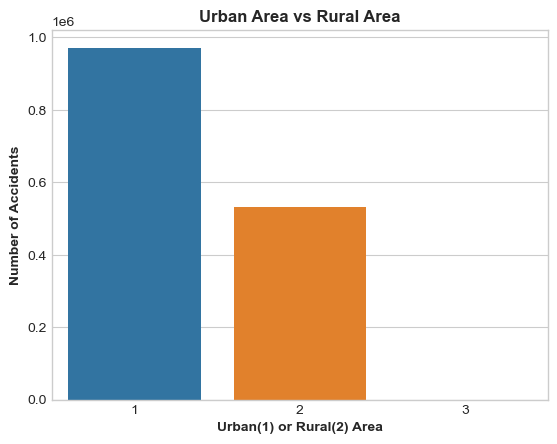

In [181]:
crashes2["Urban_or_Rural_Area"].value_counts()
plt.style.use("seaborn-whitegrid")
sns.countplot(x="Urban_or_Rural_Area",data=crashes2)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")

plt.show() 